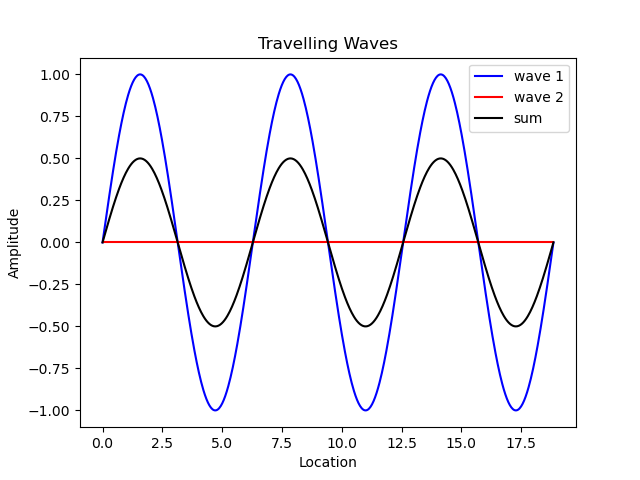

In [2]:
# travelling_waves.ipynb
# Cell 1

%matplotlib widget

# namedtuple lets us label the elements of a tuple rather than it's index
# If we declare amplitude within the tuple we can then just call amplitude
from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np
# Allowing matplotlib to now animate our graphs
# We will now be able to see how the waves change in time
from matplotlib.animation import FuncAnimation

# Using namedtuple to declare the indexs
WaveParms = namedtuple("WaveParms", ["Amplitude", "WaveNumber", "Omega"])
# Establishing two instances of the tuple
wave1_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=1 / 16)
# Flat line
wave2_params = WaveParms(Amplitude=0, WaveNumber=0, Omega=0)


def plot(ax, show_waves):
    # Declaring the use of global variables so that they can be changed in a function
    global xa, wave1, wave2, wave3

    # Ranging from 0 to 6pi with 600 readings
    # xa typically denotes that x is now an array of values
    xa = np.linspace(0, 6 * np.pi, 600)

    # This is how we call the named elements of a tuple
    ya1 = wave1_params.Amplitude * np.sin(wave1_params.WaveNumber * xa)
    ya2 = wave2_params.Amplitude * np.sin(wave2_params.WaveNumber * xa)
    # The average of the superposition of waves y1 and y2
    # In this case, will be half of y1
    ya3 = (ya1 + ya2) / 2

    if show_waves:
        # Plot returns a tuple of each line segment, we need to be able to store the first
        # Element in the tuple so that we can use it to animate the waves
        # Plot waves if True
        (wave1,) = ax.plot(xa, ya1, color="blue", label="wave 1")
        (wave2,) = ax.plot(xa, ya2, color="red", label="wave 2")
    else:
        # Don't plot otherwise
        (wave1,) = ax.plot(xa, ya1, color="white")
        (wave2,) = ax.plot(xa, ya2, color="white")

    # Plot the superposition of wave1 and wave2
    (wave3,) = ax.plot(xa, ya3, color="black", label="sum")

    ax.set_title("Travelling Waves")
    ax.set_xlabel("Location")
    ax.set_ylabel("Amplitude")

    ax.legend(loc="upper right")


def anim_frame_counter():
    # Frame counter
    n = 0
    # 160 frames = 4 secs (at 40 frames/sec)
    # This function allows us to control how ling the animation will run
    while n < 160:
        n += 1
        # yield is similar to return, where it will provide the value if called
        # However, the next time the function is called it goes back to that same yield value
        yield n


def anim_draw_frame(t):
    # Every time anim_frame_counter produces a nee count this function will update the 
    # values for our graphs in time 
    ya1 = wave1_params.Amplitude * np.sin(
        wave1_params.WaveNumber * xa + wave1_params.Omega * t
    )
    # set_data is replacing the old values with the new line segments based on the current time
    wave1.set_data(xa, ya1)
    ya2 = wave2_params.Amplitude * np.sin(
        wave2_params.WaveNumber * xa + wave2_params.Omega * t
    )
    wave2.set_data(xa, ya2)
    ya3 = (ya1 + ya2) / 2
    wave3.set_data(xa, ya3)
    return wave1, wave2, wave3


def plot_waves(label, show_waves):
    global anim

    plt.close("all")
    fig = plt.figure(label=label)
    gs = fig.add_gridspec(1, 1)

    ax = fig.add_subplot(gs[0, 0])

    plot(ax, show_waves)

    # Passing in all requirments so that we can animate our graph
    anim = FuncAnimation(
        ax.figure,
        anim_draw_frame,
        anim_frame_counter,
        interval=25,
        blit=True,
        repeat=False,
    )

    plt.show()


plot_waves("Cell 1", show_waves=True)

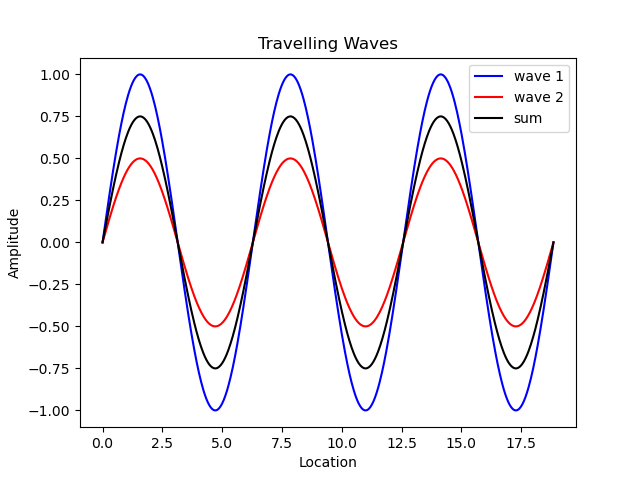

In [3]:
# Cell 2 - Wave 2 now half amplitude, same wave number, same wave velocity

wave1_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=1 / 16)
wave2_params = WaveParms(Amplitude=1 / 2, WaveNumber=1, Omega=1 / 16)
plot_waves("Cell 2", show_waves=True)

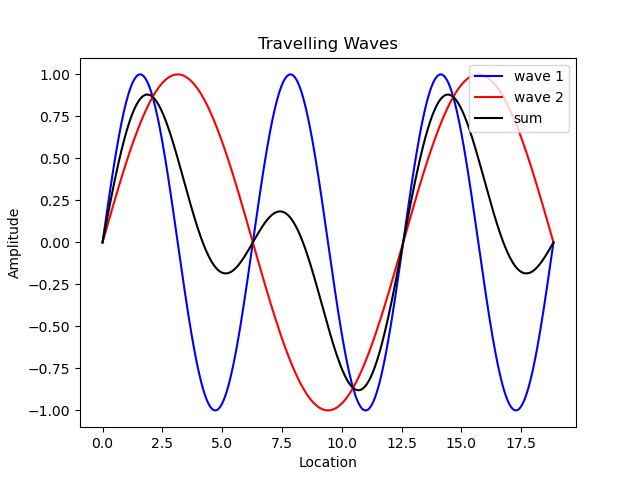

In [4]:
# Cell 3 - Wave 2 now same amplitude, half wave number, same wave velocity

wave1_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=1 / 16)
wave2_params = WaveParms(Amplitude=1, WaveNumber=1 / 2, Omega=1 / 16)
plot_waves("Cell 3", show_waves=True)

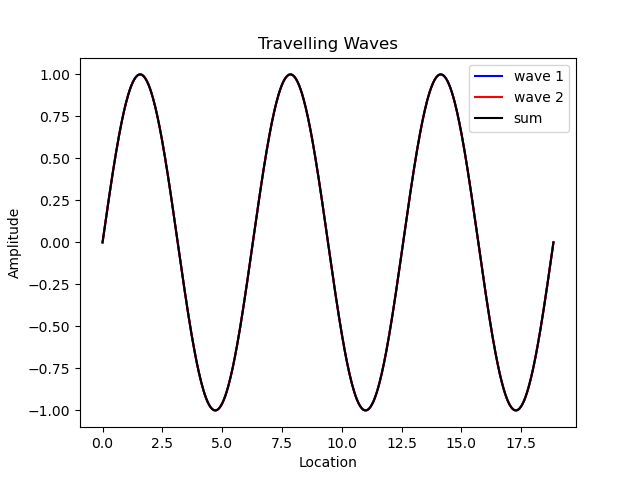

In [5]:
# Cell 4 - Wave 2 now same amplitude, same wave number, half wave velocity

wave1_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=1 / 16)
wave2_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=1 / 8)
plot_waves("Cell 4", show_waves=True)

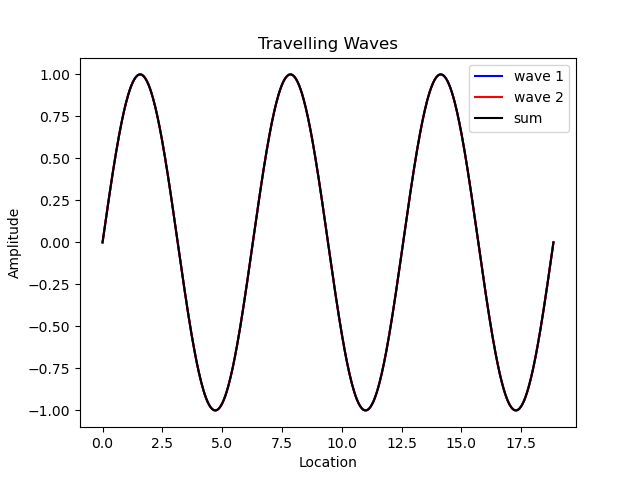

In [6]:
# Cell 5 - Wave 2 now same amplitude, same wave number, *negative* half wave velocity 

wave1_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=1 / 16)
wave2_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=-1 / 8)
plot_waves("Cell 5", show_waves=True)

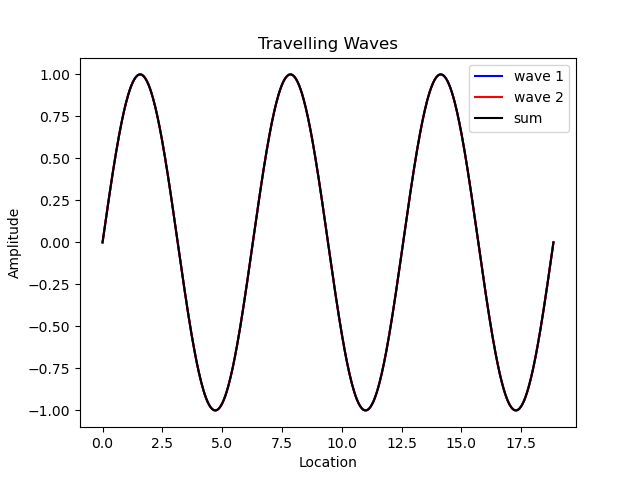

In [9]:
# Cell 6 - Wave 2 now same amplitude, same wave number, *negative* wave velocity 

wave1_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=1 / 16)
wave2_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=-1 / 16)
plot_waves("Cell 6", show_waves=True)

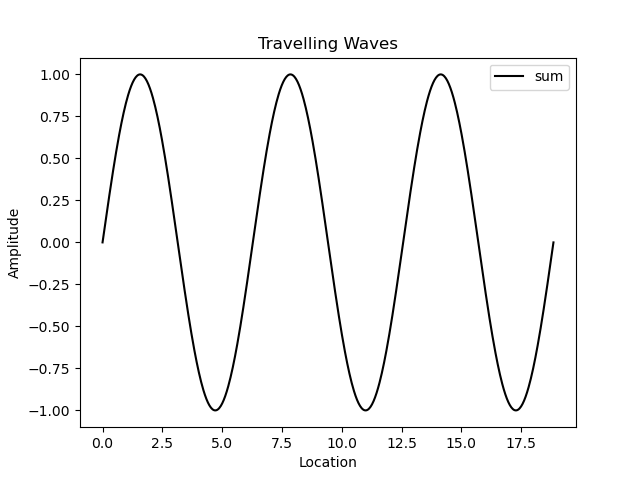

In [8]:
# Cell 7 - Wave 2 now same amplitude, same wave number, *negative* wave velocity

plot_waves("Cell 7", show_waves=False) # Show only superposition wave